In [2]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict
import pandas as pd
%matplotlib inline


In [3]:
def train_test_idx(seed):
    idx_fn = 'experiment_1001/exp1/seed_%d/indices.txt' % seed
    with open(idx_fn) as f:
        lines = f.readlines()
        train_idx = lines[0].strip().split('\t')[1].split(',')
        train_idx = [int(x) for x in train_idx]
        test_idx = lines[1].strip().split('\t')[1].split(',')
        test_idx = [int(x) for x in test_idx]
    return train_idx, test_idx

In [9]:
seeds = [0, 100, 972, 5258, 7821, 40918, 57852, 168352, 291592, 789729423][:4]
combo = [('NO_TOTAL', 'GDBcls', 'gp_lvl'),]

In [10]:
imps = defaultdict(list)
cfsns = defaultdict(list)

for seed in seeds:
    train_idx, test_idx = train_test_idx(seed)
    print('======', seed, len(test_idx))
    for total_or_not, name, wname in combo:
        exp_path = 'experiment_1001/exp1_diff_weight/%s/seed_%d' % (wname, seed)
        exp_param_path = '%s/%s' % (exp_path, 'RoadNet+Segment#%s#~2014#min-max#None' % total_or_not)
        try:
            imp = pd.read_csv('%s/imp_%s.csv' %(exp_param_path, name), index_col=0)
            imp.columns = ['label', 'importance_%d' % seed]
            imps[name].append(imp)
        except FileNotFoundError:
            print(name, 'no feature importance')
            
        cfsn = pd.read_csv('%s/cfsn_%s.csv' %(exp_param_path, name), header=[0,1], index_col=[0,1])
        cfsns[name].append(cfsn)
#     break

====== 0 89
experiment_1001/exp1_diff_weight/gp_lvl/seed_0/RoadNet+Segment#NO_TOTAL#~2014#min-max#None
====== 100 89
experiment_1001/exp1_diff_weight/gp_lvl/seed_100/RoadNet+Segment#NO_TOTAL#~2014#min-max#None
====== 972 89
experiment_1001/exp1_diff_weight/gp_lvl/seed_972/RoadNet+Segment#NO_TOTAL#~2014#min-max#None
====== 5258 89
experiment_1001/exp1_diff_weight/gp_lvl/seed_5258/RoadNet+Segment#NO_TOTAL#~2014#min-max#None


In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
def save_heatmap(df, fn):
    ax = sns.heatmap(df, annot=True, cmap='Greens', annot_kws={"size": 16})
    ax.set_xlabel('')
    ax.set_ylabel('')
    fig = ax.get_figure()
    fig.set_size_inches(10,8)
#     fig.savefig('%s.eps' % fn, format='eps', bbox_inches='tight', pad_inches=0)
#     fig.savefig('%s.png' % fn, format='png', bbox_inches='tight', pad_inches=0)
    plt.show()
    plt.close()

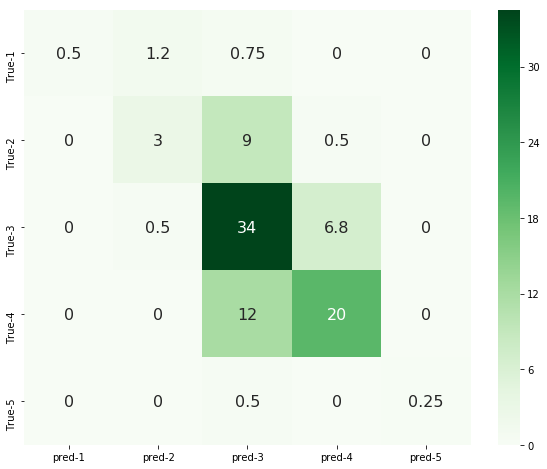

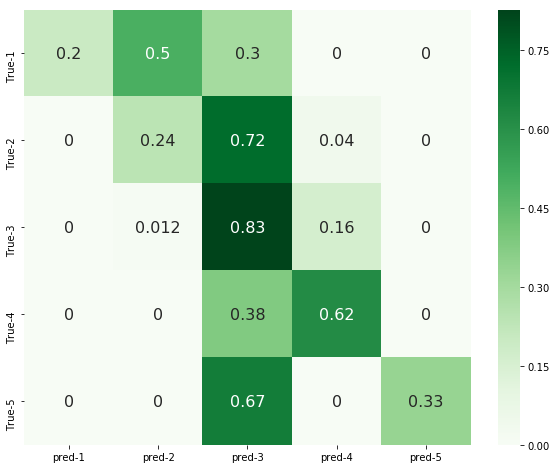

In [22]:
for total_or_not, name, wname in combo:
    total_or_type = {'TOTAL': 'total', 'NO_TOTAL': 'type'}[total_or_not]
    cfsn = sum(cfsns[name])/len(cfsns[name])
    fn = 'deliverables/experiment_1001/EXP2 average_confusion_matrix_%s_%s' % (name, total_or_type)
#     cfsn.to_csv('deliverables/experiment_1001/EXP2 average_confusion_matrix_%s_%s.csv' % (name, total_or_type))
    save_heatmap(cfsn, fn)
    
    cfsn_pcnt_per_row = cfsn.apply(lambda x: x / x.sum(), axis=1)
    fn = 'deliverables/experiment_1001/EXP2 average_confusion_matrix_as_pcnt_per_row_%s_%s' % (name, total_or_type)
#     cfsn_pcnt_per_row.to_csv('deliverables/experiment_1001/EXP2 average_confusion_matrix_as_pcnt_per_row_%s_%s.csv' % (name, total_or_type))
    save_heatmap(cfsn_pcnt_per_row, fn)
